**Importing Libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

**Importing dataset** 

In [4]:
# Loading the dataset from URL as zip file
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=URL,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [5]:
# The base directory consists of train and validation directories
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [6]:
# Both train and validation directories further consist two folders named cats and dogs
train_dir_cats = os.path.join(train_dir,'cats')
train_dir_dogs = os.path.join(train_dir,'dogs')

validation_dir_cats = os.path.join(validation_dir,'cats')
validation_dir_dogs = os.path.join(validation_dir,'dogs')

In [7]:
# Number of images in training and validation data sets
cats_train = len(os.listdir(train_dir_cats))
dogs_train = len(os.listdir(train_dir_dogs))

cats_validate = len(os.listdir(validation_dir_cats))
dogs_validate = len(os.listdir(validation_dir_dogs))

train_length = cats_train + dogs_train
validation_length = cats_validate + dogs_validate

total_images = train_length + validation_length

In [8]:
print ('Cat Images in training set : {}'.format(cats_train))
print ('Dog Images in training set : {}'.format(dogs_train))
print ('Cat Images in validation set : {}'.format(cats_validate))
print ('Dog Images in validation set : {}\n'.format(dogs_validate))

print ('Total training images : {}'.format(train_length))
print ('Total validation images : {}\n'.format(validation_length))

print ('Total number of Images : {}'.format(total_images))

Cat Images in training set : 1000
Dog Images in training set : 1000
Cat Images in validation set : 500
Dog Images in validation set : 500

Total training images : 2000
Total validation images : 1000

Total number of Images : 3000


In [9]:
# Plotting images function
def plotImages(images):
  fig,axes = plt.subplots(1,5,figsize=(20,20)) # 5 images in 1 row
  axes = axes.flatten()
  for img,ax in zip(images,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()  

**Data Augmentation**

In [10]:
# Flipping the images horizontally

image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

# The images are of varying sizes
# We are going to reshape all the images into 150x150
# Batch Size = 128

train_data_gen = image_gen.flow_from_directory(batch_size=128, directory=train_dir, shuffle=True, target_size=(150,150))

Found 2000 images belonging to 2 classes.


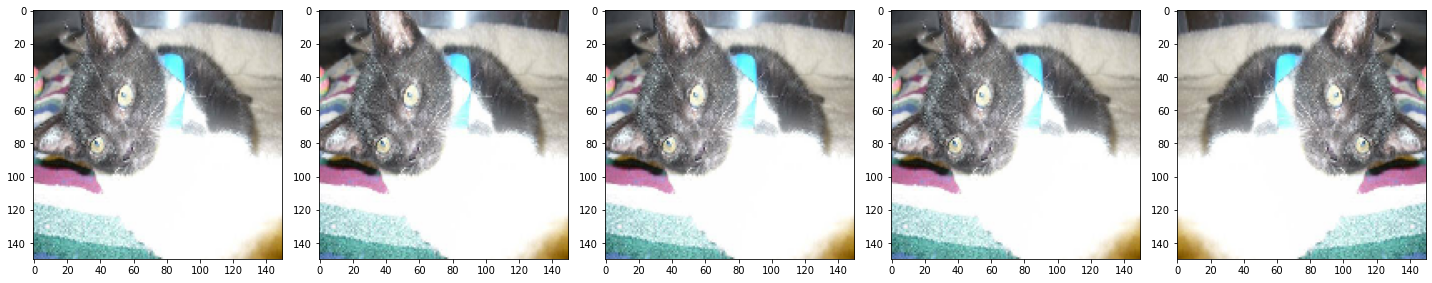

In [11]:
# Visualizing the images using plotImages function
flipped_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(flipped_images)

In [12]:
# Rotating the image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=128, directory=train_dir, shuffle=True, target_size=(150,150))

Found 2000 images belonging to 2 classes.


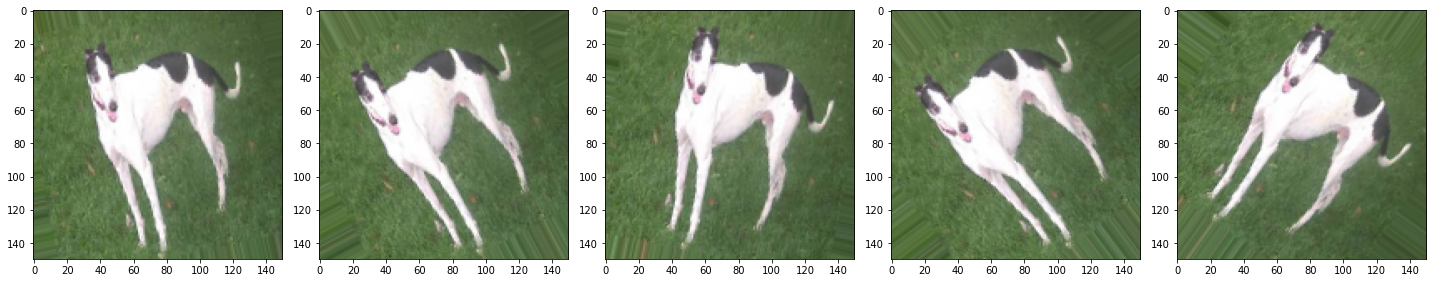

In [13]:
# Visualizing the rotated images using plotImages function

rotated_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(rotated_images)

In [14]:
# Zooming in to the pictures
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.4)

train_data_gen = image_gen.flow_from_directory(directory=train_dir, target_size=(150,150), batch_size=128, shuffle=True)

Found 2000 images belonging to 2 classes.


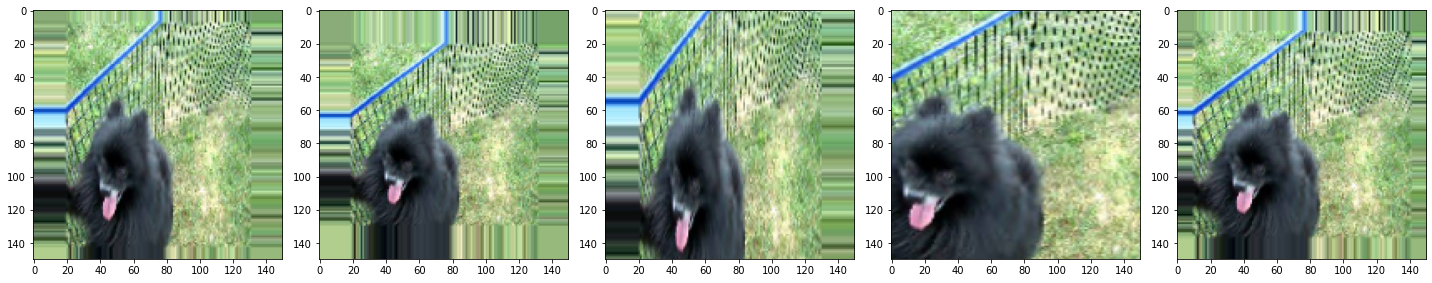

In [15]:
# Visualizing the zoomed images
zoomed_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(zoomed_images)

In [16]:
# Applying all the above methods at once

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True, zoom_range=0.2)

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    shuffle=True, 
    target_size=(150,150), 
    batch_size=128, 
    class_mode='binary')

Found 2000 images belonging to 2 classes.


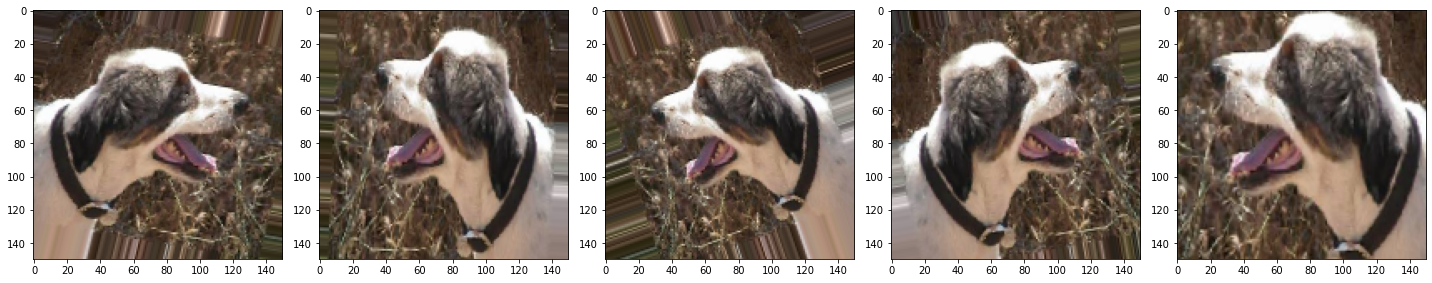

In [17]:
# Visualizing the images

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [18]:
# Creating for Validation Set

image_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen.flow_from_directory(
    directory=validation_dir,
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


**Model Creation**

In [19]:
model = tf.keras.Sequential()

# Layer 1
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# Layer 2
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# Layer 3
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# Layer 4
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

# Adding a Dropout Layer with 30 percent of nodes dropped randomly
model.add(tf.keras.layers.Dropout(0.3))

# Flattening the nodes
model.add(tf.keras.layers.Flatten())

# Fully Connected Layers with 512 units
model.add(tf.keras.layers.Dense(512,activation='relu'))

# Output Layer with 2 output units
model.add(tf.keras.layers.Dense(2))

In [20]:
# Compiling the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [21]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**Training the Model**

In [24]:
epochs=20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(2000 / float(128))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(1000 / float(128)))
)

Epoch 1/20
16/16 [==============================] - 21s 1s/step - loss: 0.5006 - accuracy: 0.7545 - val_loss: 0.5506 - val_accuracy: 0.7130
Epoch 2/20
16/16 [==============================] - 20s 1s/step - loss: 0.5066 - accuracy: 0.7590 - val_loss: 0.4797 - val_accuracy: 0.7670
Epoch 3/20
16/16 [==============================] - 19s 1s/step - loss: 0.4765 - accuracy: 0.7625 - val_loss: 0.4626 - val_accuracy: 0.7770
Epoch 4/20
16/16 [==============================] - 19s 1s/step - loss: 0.4607 - accuracy: 0.7775 - val_loss: 0.4613 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 19s 1s/step - loss: 0.4409 - accuracy: 0.7950 - val_loss: 0.4810 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 19s 1s/step - loss: 0.4692 - accuracy: 0.7675 - val_loss: 0.4765 - val_accuracy: 0.7740
Epoch 7/20
16/16 [==============================] - 19s 1s/step - loss: 0.4399 - accuracy: 0.7905 - val_loss: 0.4521 - val_accuracy: 0.7980
Epoch 8/20
16/16 [==

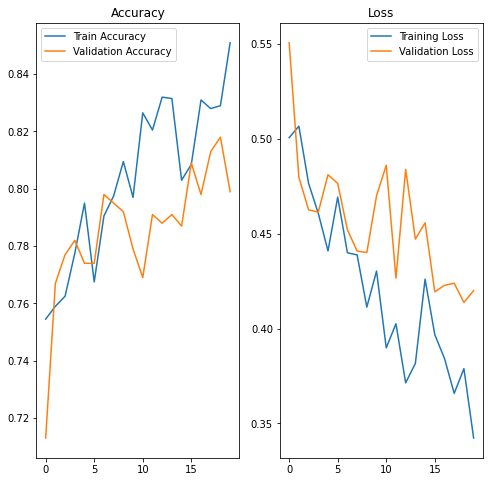

In [25]:
# Visualizing the accuracy scores

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()